# Model training

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report

In [25]:
df = pd.read_csv("../data/progress4.csv")
df = df.set_index(pd.to_datetime(df.time)).drop(["time"], axis=1)

In [26]:
df.head()

,ret,bin,side
time,,,
2021-01-09 20:37:17.462,-0.000698,0.0,1.0
2021-01-09 21:01:09.429,0.000682,1.0,1.0
2021-01-09 22:26:08.810,-0.001056,0.0,1.0
2021-01-10 02:07:16.653,-0.000500,0.0,-1.0
2021-01-10 02:19:05.256,0.000384,1.0,-1.0


In [27]:
X = df.side.values.reshape(-1,1)
X

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.]])

In [28]:
y = df.bin.values
y

array([0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1.])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    shuffle=False)

In [32]:
n_estimators = 10000
model = RandomForestClassifier(max_depth=2, n_estimators=n_estimators,
                            criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10000)

In [31]:
y_pred_rf = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.40      0.50      0.44         4
         1.0       0.71      0.62      0.67         8

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.61      0.58      0.59        12



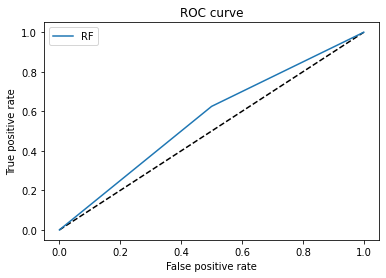

In [33]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()